<a href="https://colab.research.google.com/github/Hiragi14/Hiragi14/blob/master/vit-torchvision_patch-embedding_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision.models as models

In [2]:
model_vit = models.vit_b_16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:06<00:00, 53.3MB/s]


In [4]:
model_vit.conv_proj.weight.shape

torch.Size([768, 3, 16, 16])

In [5]:
input_layer_weight = model_vit.conv_proj.weight.detach()

In [6]:
input_weight = input_layer_weight[:,0,:,:] + input_layer_weight[:,1,:,:] + input_layer_weight[:,2,:,:]

In [7]:
input_weight.shape

torch.Size([768, 16, 16])

In [8]:
weight = torch.sum(input_weight, dim=0)

In [9]:
weight.shape

torch.Size([16, 16])

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

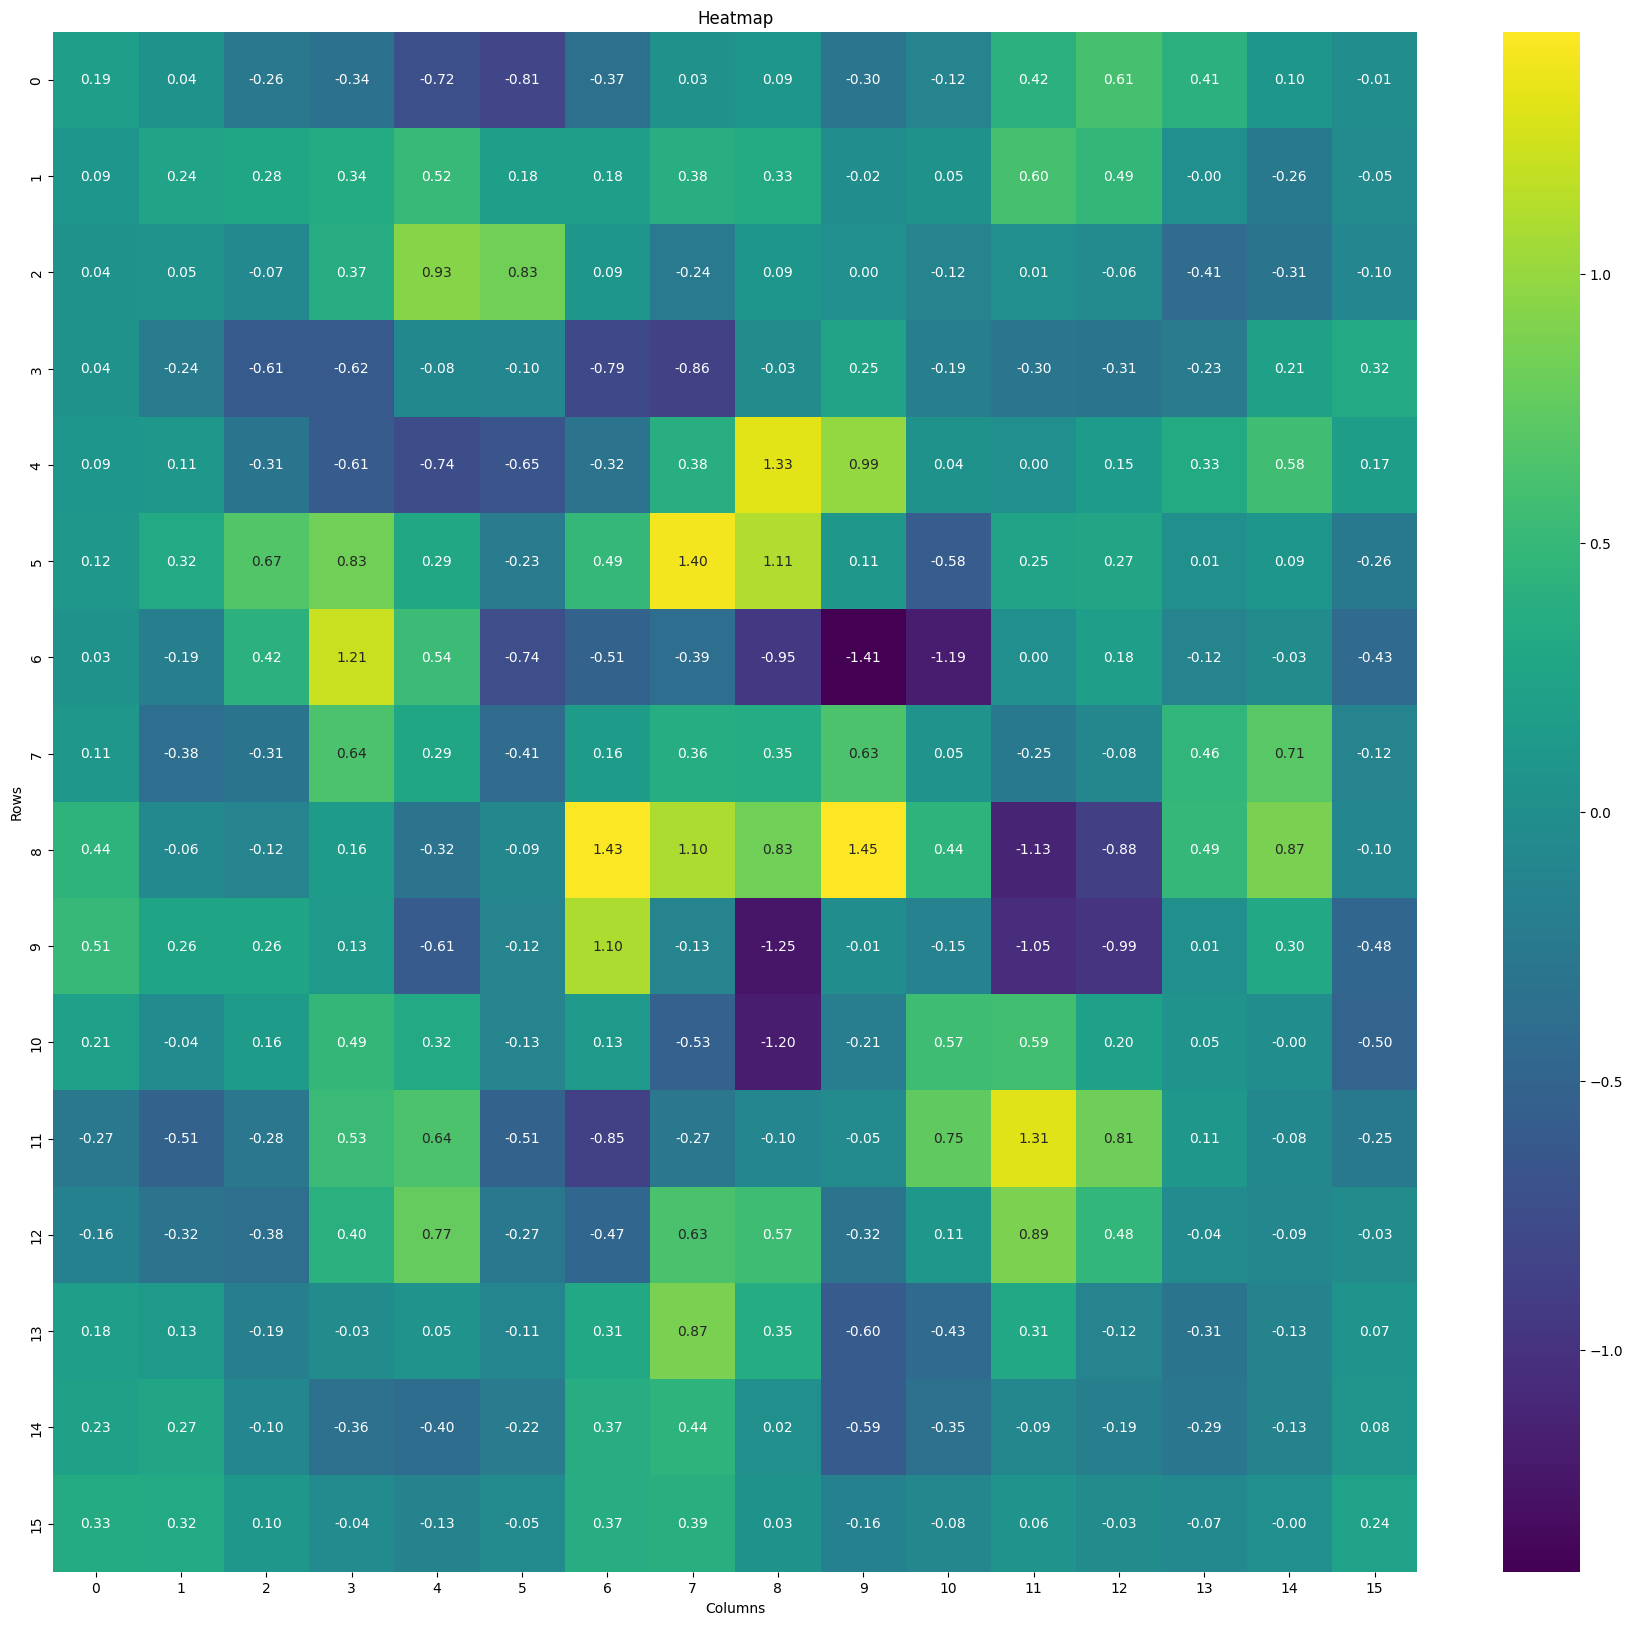

In [11]:
# ヒートマップを作成
plt.figure(figsize=(22, 20))
sns.heatmap(weight, annot=True, fmt=".2f", cmap='viridis', cbar=True)

# タイトルとラベルを設定
plt.title('Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# ヒートマップを表示
plt.show()